In [12]:
library(WGCNA)
library("openxlsx")

Warning message:
"package 'WGCNA' was built under R version 4.1.1"

Attaching package: 'WGCNA'


The following object is masked from 'package:stats':

    cor


Warning message:
"package 'openxlsx' was built under R version 4.1.1"


In [13]:
datExpr = read.csv("adtt.csv",row.names = 1)
datExpr = t(datExpr)
multiExpr=list(list(data = datExpr))
exprSize = checkSets(multiExpr)
nSets = exprSize$nSets
nGenes = exprSize$nGenes
nSamples = exprSize$nSamples

In [34]:
nGenes

[1] 1961

In [16]:
t1=read.csv("adt.csv",row.names = 1)
datTraits=data.frame(t1)

In [17]:
powers = c(c(1:10), seq(from = 12, to=20, by=2))

sft = pickSoftThreshold(multiExpr[[1]]$data, powerVector = powers, verbose = 5)

pickSoftThreshold: will use block size 1961.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1961 of 1961


Warning message:
"executing %dopar% sequentially: no parallel backend registered"
Warning message in eval(xpr, envir = envir):
"Some correlations are NA in block 1 : 1961 ."


   Power SFT.R.sq slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.296 5.130          0.597    1100      1130   1290
2      2    0.422 4.200          0.321     785       815   1010
3      3    0.388 4.020          0.237     618       643    855
4      4    0.950 2.010          0.980     513       533    746
5      5    0.907 1.880          0.986     440       454    666
6      6    0.852 1.780          0.965     386       395    603
7      7    0.806 1.710          0.945     344       350    553
8      8    0.767 1.650          0.930     311       315    511
9      9    0.733 1.610          0.912     283       286    476
10    10    0.704 1.570          0.896     261       261    446
11    12    0.664 1.330          0.872     225       223    396
12    14    0.522 0.687          0.728     198       194    357
13    16    0.472 0.520          0.736     177       171    326
14    18    0.419 0.428          0.726     160       154    300
15    20    0.363 0.345          0.747  

In [21]:
#plt
sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")

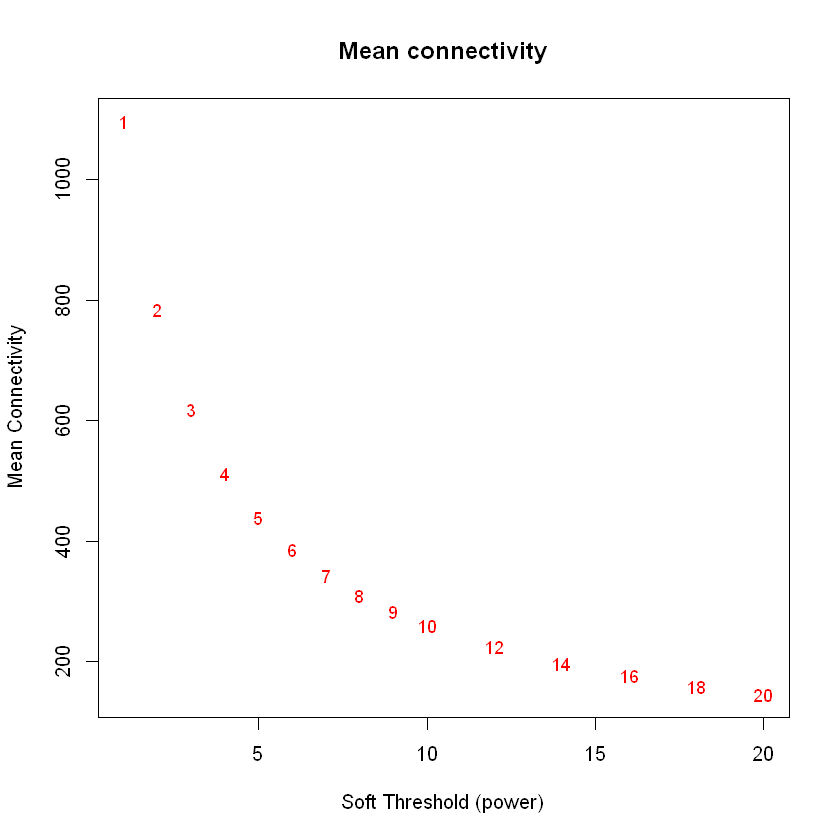

In [22]:
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

In [23]:
softPower <- sft$powerEstimate
adjacency = adjacency(multiExpr[[1]]$data, power = softPower);

TOM = TOMsimilarity(adjacency);

dissTOM = 1-TOM
hierTOM = hclust(as.dist(dissTOM),method="average");

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [24]:
# ADJ1_cor <- abs(WGCNA::cor( multiExpr[[1]]$data,use = "p" ))^softPower
k <- softConnectivity(datE=multiExpr[[1]]$data,power=softPower) 
sizeGrWindow(10, 5)
par(mfrow=c(1,2))
hist(k)
scaleFreePlot(k,main="Check Scale free topology\n")

 softConnectivity: FYI: connecitivty of genes with less than 4 valid samples will be returned as NA.
 ..calculating connectivities.. 


Warning message in as.vector(log10(dk)):
"NaNs produced"


ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


In [25]:
#cluster
geneTree = hclust(as.dist(dissTOM), method = "average");

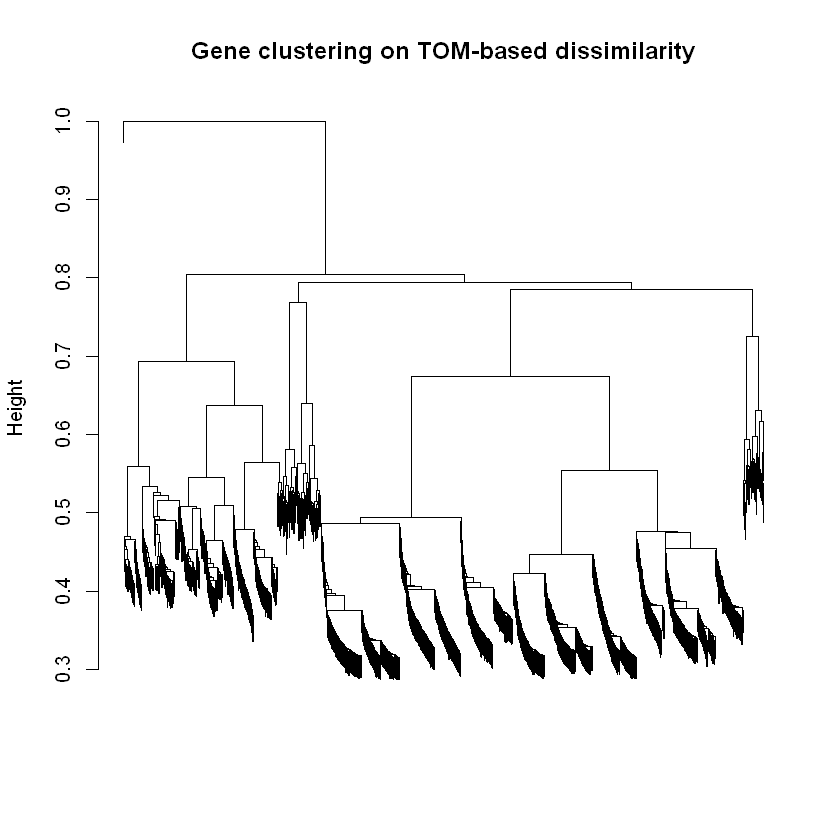

In [28]:
# Plot the resulting clustering tree (dendrogram)
#windows()
#sizeGrWindow(12,9)
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
     labels = FALSE, hang = 0.04);

In [29]:
minModuleSize = 30;

dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                            deepSplit = 2, pamRespectsDendro = FALSE,
                            minClusterSize = minModuleSize);
table(dynamicMods)

 ..cutHeight not given, setting it to 0.993  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
  1 240 240 188 160 149 147 134  97  87  87  83  79  64  55  42  39  35  34 

dynamicColors
       black         blue        brown         cyan        green  greenyellow 
         134          240          188           55          149           83 
        grey       grey60    lightcyan   lightgreen      magenta midnightblue 
           1           35           39           34           87           42 
        pink       purple          red       salmon          tan    turquoise 
          97           87          147           64           79          240 
      yellow 
         160 

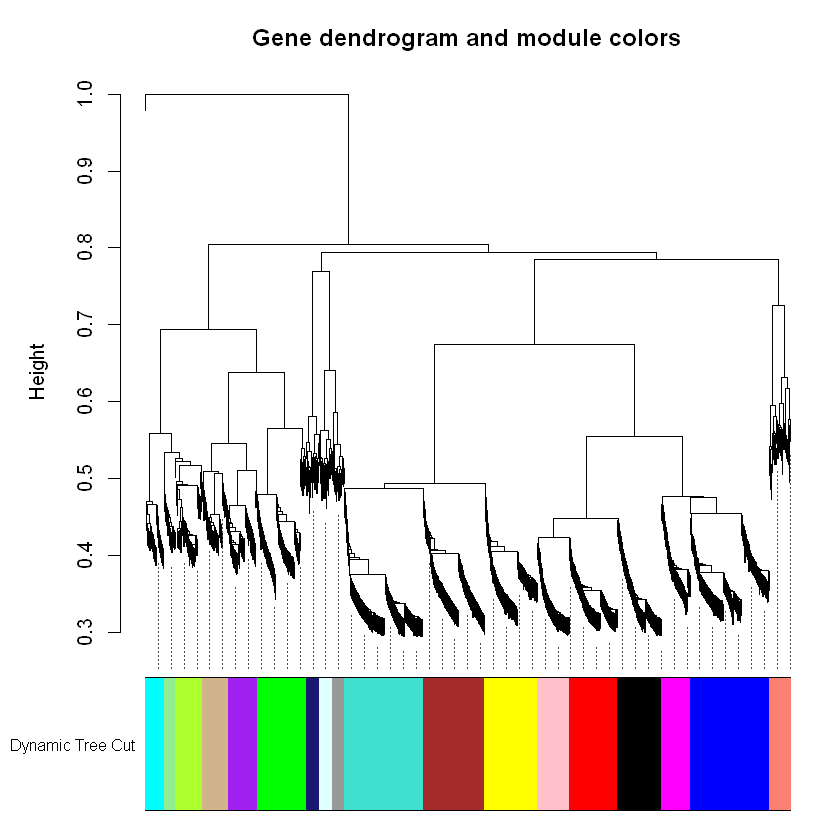

In [30]:
dynamicColors <- labels2colors(dynamicMods)
table(dynamicColors)
 
plotDendroAndColors(geneTree, dynamicColors, 'Dynamic Tree Cut',
    dendroLabels = FALSE, addGuide = TRUE, hang = 0.03, guideHang = 0.05,
    main = 'Gene dendrogram and module colors')

ERROR: Error in moduleEigengenes(gene, colors = dynamicColors): object 'gene' not found


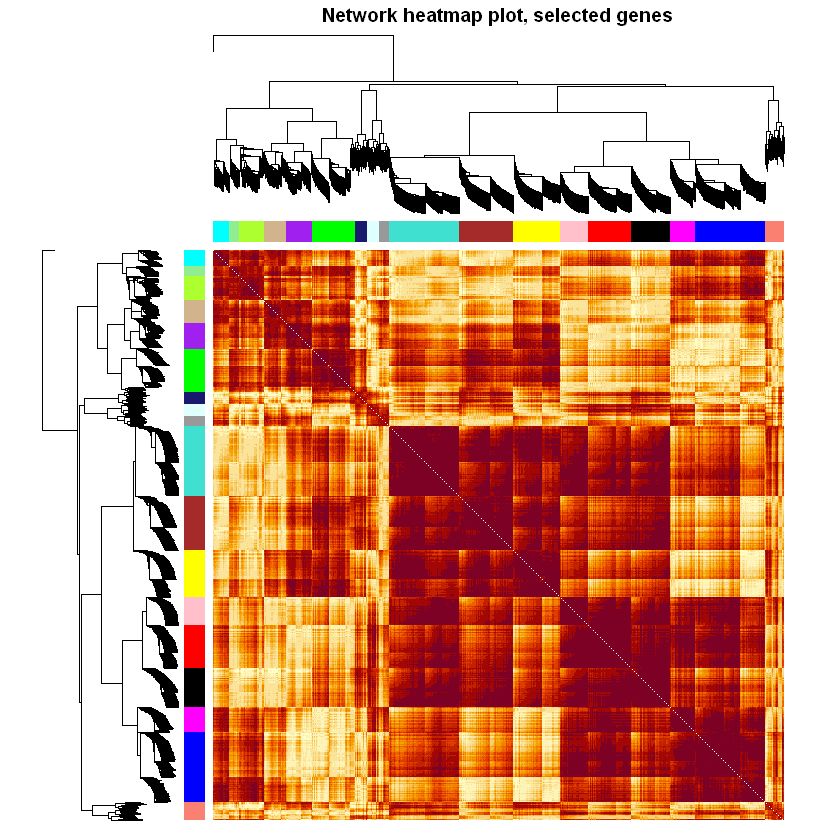

In [31]:
#heatmap
plot_sim <- -(1-TOM)
plot_sim <- log(TOM)
diag(plot_sim) <- NA
TOMplot(plot_sim, geneTree, dynamicColors,
    main = 'Network heatmap plot, selected genes')




In [38]:
MEList <- moduleEigengenes(datExpr, colors = dynamicColors)

In [39]:
MEs <- MEList$eigengenes
head(MEs)[1:6]

,MEblack,MEblue,MEbrown,MEcyan,MEgreen,MEgreenyellow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lab1,-0.07410991,0.7018855,0.249442278,0.7443786,0.6758223,0.8650876
lab2,0.59536285,-0.6410066,0.550338008,-0.1975036,0.2391302,-0.3078008
non1,-0.76272132,0.1870625,-0.796804727,0.0852801,-0.6412042,-0.2503793
non2,0.24146838,-0.2479414,-0.002975559,-0.6321551,-0.2737483,-0.3069075


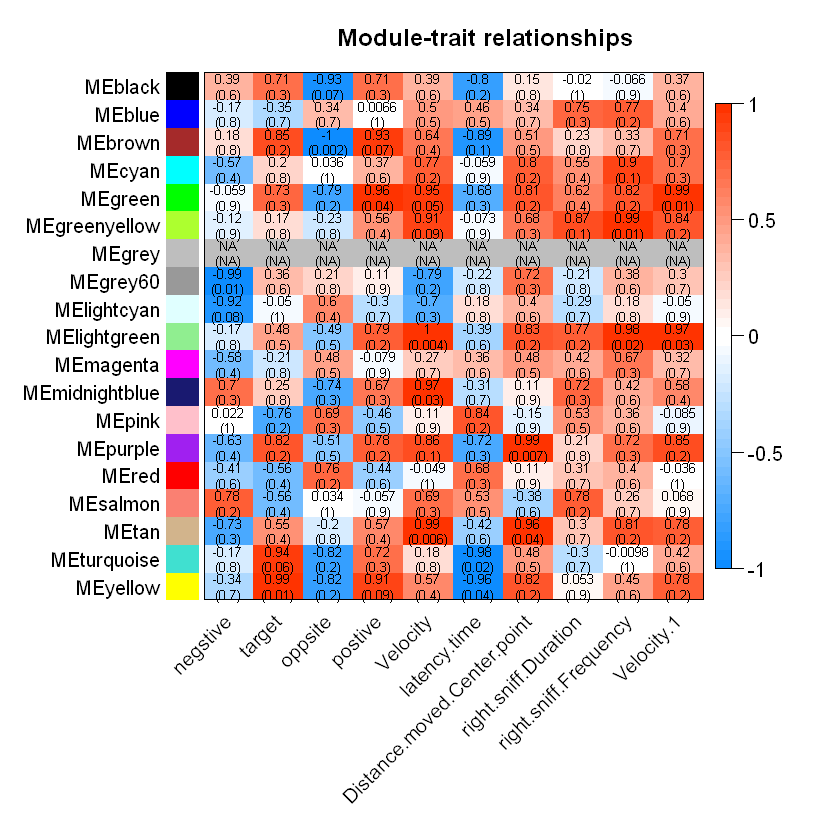

In [40]:
moduleTraitCor_noFP <- cor(MEs, datTraits[,1:10], use = "p");
moduleTraitPvalue_noFP = corPvalueStudent(moduleTraitCor_noFP, nSamples); 
textMatrix_noFP <- paste(signif(moduleTraitCor_noFP, 2), "\n(", signif(moduleTraitPvalue_noFP, 1), ")", sep = ""); 
par(mar = c(10, 8.5, 3, 3)); 
labeledHeatmap(Matrix = moduleTraitCor_noFP, 
               xLabels = names(datTraits[,1:10]), 
               yLabels = names(MEs), 
               ySymbols = names(MEs), 
               colorLabels = FALSE, 
               colors = blueWhiteRed(50), 
               textMatrix = textMatrix_noFP,
               setStdMargins = FALSE, 
               cex.text = 0.65, 
               zlim = c(-1,1), 
               main = paste("Module-trait relationships")) 

In [41]:
#relationship
gene_module <- data.frame(gene_name = colnames(multiExpr[[1]]$data), module = dynamicColors, stringsAsFactors = FALSE)
write.table (gene_module, file ="res.csv", sep =",", row.names =TRUE, col.names =TRUE, quote =TRUE)

